# COVID-19 in Nigeria: A Time Series Analysis

**BY: JUDITH OKON**

![Picture](covid19-special-notes.png)


## Problem Statement

This Jupyter notebook provides a detailed analysis of the COVID-19 pandemic in Nigeria, focusing on the time period from 2020 to 2022. The analysis is based on a time series dataset of daily confirmed cases, deaths, and recoveries in each state of Nigeria.

In this notebook, I will provide an indepth analysis of the COVID-19 pandemic in Nigeria while answering the following questions;


1.  What was the total confirmed cases in Nigeria for the time period of this analysis?

2.  What was the total deaths cases in Nigeria for the time period of this analysis?

3. What was the total recovered cases in Nigeria for the time period of this analysis?

4. What was the mortality rate in Nigeria from covid-19?

5. What was the recovery rate in Nigeria from covid-19?

6. What was the daily average of confirmed, death, and recovered cases in Nigeria for the time period of the analysis?

7. What was the monthly average of confirmed, death, and recovered cases in Nigeria for the time period of the analysis?

8. What state was most affected by the pandemic?

9. What gender was affected most by the pandemic?

10. Was there any correlation between the number of confirmed, death and recovery cases?

Through this analysis, I aim to provide valuable insights into the dynamics of the COVID-19 pandemic in Nigeria, and to inform policy makers, public health officials, and the general public about the state of the pandemic during the time period of this dataset.


________

# DATA LOADING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('covid19 nigeria dataset.csv')

In [3]:
df.head()

,ID,DATE,ISO_3,PAYS,ID_PAYS,REGION,ID_REGION,CONTAMINES,DECES,GUERIS,CONTAMINES_FEMME,CONTAMINES_HOMME,CONTAMINES_GENRE_NON_SPECIFIE,SOURCE
0,1,2/27/20,NGA,Nigéria,15,Abia,170,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
1,2,2/27/20,NGA,Nigéria,15,Adamawa,171,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
2,3,2/27/20,NGA,Nigéria,15,Akwa Ibom,172,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
3,4,2/27/20,NGA,Nigéria,15,Anambra,173,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
4,5,2/27/20,NGA,Nigéria,15,Bauchi,174,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26866 entries, 0 to 26865
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             26866 non-null  int64  
 1   DATE                           26866 non-null  object 
 2   ISO_3                          26866 non-null  object 
 3   PAYS                           26866 non-null  object 
 4   ID_PAYS                        26866 non-null  int64  
 5   REGION                         26866 non-null  object 
 6   ID_REGION                      26866 non-null  int64  
 7   CONTAMINES                     26802 non-null  float64
 8   DECES                          26463 non-null  float64
 9   GUERIS                         26280 non-null  float64
 10  CONTAMINES_FEMME               17734 non-null  float64
 11  CONTAMINES_HOMME               17734 non-null  float64
 12  CONTAMINES_GENRE_NON_SPECIFIE  23663 non-null 

In [5]:
print(('There are {} rows and {} columns').format(df.shape[0], df.shape[1]))

There are 26866 rows and 14 columns


In [6]:
rd = df.sample(10)
rd.T

,6683,20501,7224,11207,1064,6931,24632,7320,6483,514
ID,6684,20502,7225,11208,1065,6932,24633,7321,6484,515
DATE,8/20/20,8/19/21,9/4/20,12/17/20,3/26/20,8/27/20,12/6/21,9/6/20,8/15/20,3/11/20
ISO_3,NGA,NGA,NGA,NGA,NGA,NGA,NGA,NGA,NGA,NGA
PAYS,Nigéria,Nigéria,Nigéria,Nigéria,Nigéria,Nigéria,Nigéria,Nigéria,Nigéria,Nigéria
ID_PAYS,15,15,15,15,15,15,15,15,15,15
REGION,Sokoto,Kano,Bauchi,Yobe,Abia,Gombe,Cross River,Lagos,Kwara,Katsina
ID_REGION,203,189,174,205,170,185,178,194,193,190
CONTAMINES,0.0,0.0,0.0,0.0,0.0,3.0,0.0,39.0,18.0,0.0
DECES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GUERIS,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Our dataset needs some cleaning, this will be done in the next section

In [7]:
data1 = df.copy() # Create a backup copy

___

# DATA CLEANING

*I observed some issues with the dataset that required cleaning, they include;*

1. Dropping some unnecessary columns
2. Correcting the names under PAYS column
3. Handling missing values
4. Changing datatype of float to int and date to datetime
5. Changing the column name to English
6. Checking for irregularities in the dataset
7. Creating a new dataframe from the original dataframe
8. Dropping non-specifie rows from original dataframe

***Let's begin data cleaning***

## 1. Dropping some unnecessary columns 

- The ID column will be dropped because the index column will be used
- The ISO_3 column will be dropped because PAYS column shows the full name
- The ID_PAYS column wil be dropped because it doesnt add any relevance to our analysis
- The ID_REGION will be dropped because the REGION column is sufficient
- The SOURCE column wil be dropped because it doesnt add any relevance to our analysis

In [8]:
df.drop(['ID','ISO_3','ID_PAYS', 'ID_REGION', 'SOURCE'], axis =1, inplace = True)

In [9]:
df.head(5)

,DATE,PAYS,REGION,CONTAMINES,DECES,GUERIS,CONTAMINES_FEMME,CONTAMINES_HOMME,CONTAMINES_GENRE_NON_SPECIFIE
0,2/27/20,Nigéria,Abia,0.0,0.0,0.0,0.0,0.0,0.0
1,2/27/20,Nigéria,Adamawa,0.0,0.0,0.0,0.0,0.0,0.0
2,2/27/20,Nigéria,Akwa Ibom,0.0,0.0,0.0,0.0,0.0,0.0
3,2/27/20,Nigéria,Anambra,0.0,0.0,0.0,0.0,0.0,0.0
4,2/27/20,Nigéria,Bauchi,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Correcting the names under PAYS column

The name Nigéria will be changed to Nigeria

In [10]:
df['PAYS']= df['PAYS'].replace('Nigéria', 'Nigeria')

In [11]:
df[['PAYS']].sample(5)

,PAYS
6692,Nigeria
6426,Nigeria
14122,Nigeria
23039,Nigeria
18346,Nigeria


## 3. Handling missing values

In [12]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending = False)

CONTAMINES_FEMME                 9132
CONTAMINES_HOMME                 9132
CONTAMINES_GENRE_NON_SPECIFIE    3203
GUERIS                            586
DECES                             403
CONTAMINES                         64
dtype: int64

The missing values will be replaced with 0. I believe if a value was not recorded for contaminated, deaths and recovered columns etc, that means there were no values to record.

In [13]:
df = df.fillna(0)

In [14]:
df.isnull().sum().sum()

0

All the missing vales have been handled

## 4. Changing datatype of float to int and date to datetime

The number of a people in a place can be discribed as a dicrete variables, we cannot have 2.2 people in a room, so I will change the datatype of each 'non object' value here to an int datatype.

The date column should be in a datetime datatype

**Changing the datatype of numerical variables to int**

In [15]:
numerical = [feature for feature in df.columns if df[feature].dtypes != 'O']
print(numerical)

['CONTAMINES', 'DECES', 'GUERIS', 'CONTAMINES_FEMME', 'CONTAMINES_HOMME', 'CONTAMINES_GENRE_NON_SPECIFIE']


In [16]:
df[numerical] = df[numerical].astype(int)

In [17]:
df['CONTAMINES'].dtype

dtype('int64')

**Changing the datatype of date column to datetime**

In [18]:
df['DATE'] = pd.to_datetime(df['DATE'], format = '%m/%d/%y')

In [19]:
df[['DATE']].sample(5)

,DATE
6470,2020-08-15
18878,2021-07-07
25307,2021-12-23
14808,2021-03-22
18201,2021-06-19


## 5. Changing the column names to English

These column names are in french, so I will be changing it to english because I am working with the english language. Also, they will be changed to lower case letters for ease of use.  

In [20]:
df = df.rename(columns = {'PAYS': 'country', 'REGION': 'state', 'CONTAMINES': 'confirmed', 'DECES':'deaths', 
           'GUERIS': 'recovered', 'CONTAMINES_FEMME': 'confirmed_females', 'CONTAMINES_HOMME':
           'confirmed_males', 'CONTAMINES_GENRE_NON_SPECIFIE': 'confirmed_gender_unspecified'})

df.columns = df.columns.str.lower()

In [21]:
df.head()

,date,country,state,confirmed,deaths,recovered,confirmed_females,confirmed_males,confirmed_gender_unspecified
0,2020-02-27,Nigeria,Abia,0,0,0,0,0,0
1,2020-02-27,Nigeria,Adamawa,0,0,0,0,0,0
2,2020-02-27,Nigeria,Akwa Ibom,0,0,0,0,0,0
3,2020-02-27,Nigeria,Anambra,0,0,0,0,0,0
4,2020-02-27,Nigeria,Bauchi,0,0,0,0,0,0


## 6. Checking for irregularities in the dataset

In [22]:
df.describe()

,confirmed,deaths,recovered,confirmed_females,confirmed_males,confirmed_gender_unspecified
count,26866.000000,26866.000000,26866.000000,26866.000000,26866.000000,26866.000000
mean,9.417963,0.116690,8.524492,1.450234,0.831237,7.136492
std,45.695065,0.935739,106.549817,20.634374,12.338562,44.069426
min,-1.000000,0.000000,-46.000000,0.000000,-90.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3393.000000,79.000000,10946.000000,696.000000,493.000000,3393.000000


There are some irregularities in the minimun values of confirmed, recovered, confirmed_males and confirmed_gender_unspecified. Humans cannot be quantified with a negative value, so I will investigate further and fix.

**First Fix**

In [23]:
df.loc[df['confirmed'] == -1]

,date,country,state,confirmed,deaths,recovered,confirmed_females,confirmed_males,confirmed_gender_unspecified
24323,2021-11-28,Nigeria,Anambra,-1,0,0,0,0,-1


In [24]:
# Change value to 0, because that the most common value. I could have dropped it, if it was not a time series data.

df.loc[24323, ['confirmed','confirmed_gender_unspecified']] = 0

**Second Fix**

In [25]:
df.loc[df['recovered'] == -46]

,date,country,state,confirmed,deaths,recovered,confirmed_females,confirmed_males,confirmed_gender_unspecified
23799,2021-11-14,Nigeria,Edo,0,8,-46,0,0,0


In [26]:
# Also change value to 0

df.loc[23799, 'recovered'] = 0

**Third Fix**

In [27]:
df.loc[df['confirmed_males'] == -90]

,date,country,state,confirmed,deaths,recovered,confirmed_females,confirmed_males,confirmed_gender_unspecified
4483,2020-06-23,Nigeria,Non spécifié,0,0,0,542,-90,0


In [28]:
# Since the value for male is wrong, I will convert both confirmed_females and confirmed_males to 0

df.loc[4483, ['confirmed_females','confirmed_males']] = 0

I am done fixing all negative value issues, let us recheck.

In [29]:
df.describe()

,confirmed,deaths,recovered,confirmed_females,confirmed_males,confirmed_gender_unspecified
count,26866.000000,26866.000000,26866.000000,26866.000000,26866.000000,26866.000000
mean,9.418000,0.116690,8.526204,1.430060,0.834586,7.136529
std,45.695056,0.935739,106.549310,20.369111,12.326112,44.069419
min,0.000000,0.000000,-11.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3393.000000,79.000000,10946.000000,696.000000,493.000000,3393.000000


Wow, after handling the one negative number in recovered column, another one has popped up.

**Fourth Fix**

In [30]:
df.loc[df['recovered'] == -11]

,date,country,state,confirmed,deaths,recovered,confirmed_females,confirmed_males,confirmed_gender_unspecified
25923,2022-01-09,Nigeria,Borno,0,0,-11,0,0,0


In [31]:
# change value to 0

df.loc[25923, 'recovered'] = 0

I am done handling again, however let us recheck again

In [32]:
df.describe()

,confirmed,deaths,recovered,confirmed_females,confirmed_males,confirmed_gender_unspecified
count,26866.000000,26866.000000,26866.000000,26866.000000,26866.000000,26866.000000
mean,9.418000,0.116690,8.526614,1.430060,0.834586,7.136529
std,45.695056,0.935739,106.549257,20.369111,12.326112,44.069419
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3393.000000,79.000000,10946.000000,696.000000,493.000000,3393.000000


Finally, no negative values in sight.

## 7. Creating a new dataframe out of the original dataframe

In a further analysis, I noticed that the state column had values called Non spécifié, at first glance these values seemed useless, but during my investigation, I realized that it was not totally useless.
The Non spécifié values under state column actually corresponds with the values under the confirmed_females and confirmed_males column. The rows under these 3 columns actually represent the total number of confirmed cases for each day and are split into male and female categories. 

I will now extract just the rows with the value (Non spécifié) under the state column, to better visualize their use.

In [33]:
df1 = df.loc[df['state'] == 'Non spécifié']
df1 = df1.reset_index(drop= True) #to reset the index of this new dataframe
df1.sample(10)

,date,country,state,confirmed,deaths,recovered,confirmed_females,confirmed_males,confirmed_gender_unspecified
160,2020-08-05,Nigeria,Non spécifié,0,0,0,298,159,0
213,2020-09-27,Nigeria,Non spécifié,0,0,0,81,45,0
624,2021-11-12,Nigeria,Non spécifié,0,0,0,0,0,0
225,2020-10-09,Nigeria,Non spécifié,0,0,0,98,53,0
153,2020-07-29,Nigeria,Non spécifié,0,0,0,199,205,0
697,2022-01-24,Nigeria,Non spécifié,0,0,0,0,0,0
588,2021-10-07,Nigeria,Non spécifié,0,0,0,0,0,0
211,2020-09-25,Nigeria,Non spécifié,0,0,0,138,75,0
92,2020-05-29,Nigeria,Non spécifié,0,0,0,217,170,0
660,2021-12-18,Nigeria,Non spécifié,0,0,0,0,0,0


In [34]:
# Drop columns irrelevant to this new dataset. We only need contaminated female and males, perharps the other columns
# have 0 value throughout.

df1.drop(['country','confirmed','deaths','recovered', 'confirmed_gender_unspecified'], axis = 1, inplace = True)


# Change Non spécifié to unspecified

df1['state'] = df1['state'].replace('Non spécifié', 'Unspecified')

In [35]:
df1.head().sample(5)

,date,state,confirmed_females,confirmed_males
2,2020-02-29,Unspecified,0,0
4,2020-03-02,Unspecified,0,0
3,2020-03-01,Unspecified,0,0
0,2020-02-27,Unspecified,0,0
1,2020-02-28,Unspecified,0,0


In [36]:
# Change the datatype to int
df1[['confirmed_females', 'confirmed_males']] = df1[['confirmed_females', 'confirmed_males']].astype(int)

In [37]:
print('There are {} rows and {} columns in the new dataframe'.format(df1.shape[0],df1.shape[1]))

There are 707 rows and 4 columns in the new dataframe


## 8. Dropping non-specifie rows and contaminated female and male columns from original dataframe (df)

Since I have created a new dataframe for Non spécifié rows, I will remove it from our original dataframe and handle in separately in the new dataframe created for it.

In [38]:
# Dropping the rows
df = df.drop(df.loc[df['state'] == 'Non spécifié'].index)
df = df.reset_index(drop = True) #to reset the index of the original dataframe

# Dropping the columns
df.drop(['confirmed_females', 'confirmed_males'], axis = 1, inplace = True)

In [39]:
df['state'].unique()

array(['Abia', 'Adamawa', 'Akwa Ibom', 'Anambra', 'Bauchi', 'Bayelsa',
       'Benue', 'Borno', 'Cross River', 'Delta', 'Ebonyi', 'Edo', 'Ekiti',
       'Enugu', 'Federal Capital Territory', 'Gombe', 'Imo', 'Jigawa',
       'Kaduna', 'Kano', 'Katsina', 'Kebbi', 'Kogi', 'Kwara', 'Lagos',
       'Nasarawa', 'Niger', 'Ogun', 'Osun', 'Ondo', 'Oyo', 'Plateau',
       'Rivers', 'Sokoto', 'Taraba', 'Yobe', 'Zamfara'], dtype=object)

In [40]:
df.head()

,date,country,state,confirmed,deaths,recovered,confirmed_gender_unspecified
0,2020-02-27,Nigeria,Abia,0,0,0,0
1,2020-02-27,Nigeria,Adamawa,0,0,0,0
2,2020-02-27,Nigeria,Akwa Ibom,0,0,0,0
3,2020-02-27,Nigeria,Anambra,0,0,0,0
4,2020-02-27,Nigeria,Bauchi,0,0,0,0


In [41]:
print('There are {} rows and {} columns in the original dataframe'.format(df.shape[0],df.shape[1]))

There are 26159 rows and 7 columns in the original dataframe


___

# DATA EXPLORATION & VISUALIZATION

>**Now to the main event.**

The questions asked in the <a href="#Problem-Statement">Problem Statement Section</a> will be explored, visualized and answered in this section. Visualization of the data will be achieved using barcharts, piecharts, line plots, heatmaps and scatter plots.

## 1. What was the total confirmed cases in Nigeria for the time period of this analysis?

In order to answer this question, a time series plot will be created to visualize the daily trend of confirmed cases across each state in Nigeria from 2020 to 2022 

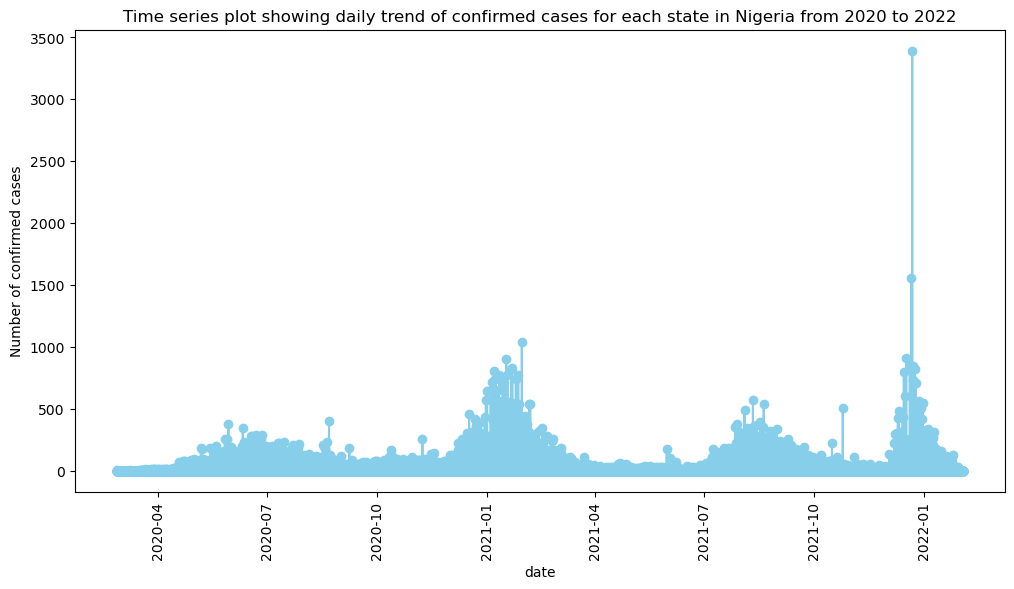

In [42]:
# Create a figure and axis object
fig,ax = plt.subplots(figsize = (12,6))
    
# Create a time series for all cases
plt.plot(df['date'],df['confirmed'], color = 'skyblue', marker = 'o')
    
# Set the other parameters
plt.title('Time series plot showing daily trend of confirmed cases for each state in Nigeria from 2020 to 2022')
plt.xlabel('date')
plt.xticks(rotation = 90)
plt.ylabel('Number of confirmed cases')

plt.show()

Based on this time series plot for COVID-19 across each state in Nigeria, it can be observed that the first wave of the pandemic in Nigeria began in April 2020. Before that month, we noticed a straight line in the plot marking around 0 meaning there were no confirmed cases before April 2020. 

These confirmed cases continued to rise and fall gradually. However, towards the end of 2021 and the beginning of 2022, there was a very high number of confirmed case as seen in the plot.

In [43]:
ans1 = df['confirmed'].sum()
print('The total Confirmed Cases in Nigeria for the time period of the analysis was {}'.format(ans1))

The total Confirmed Cases in Nigeria for the time period of the analysis was 253024


## 2. What was the total death cases in Nigeria for the time period of this analysis?

To answer this question, a time series plot will be created to visualize the daily trend of death cases across each state in Nigeria from 2020 to 2022 

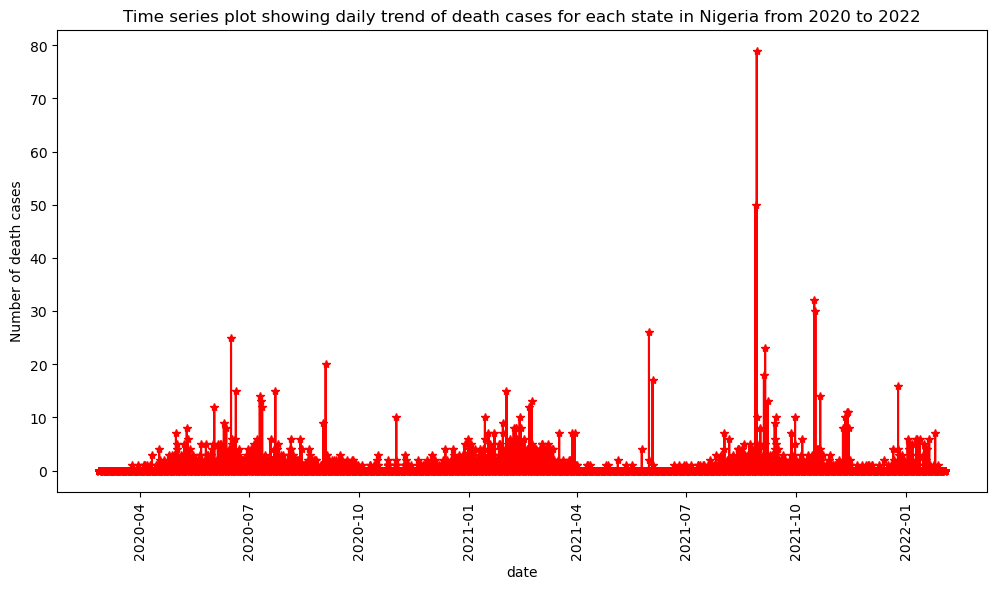

In [44]:
# Create a figure and axis object
fig,ax = plt.subplots(figsize = (12,6))
    
# Create a time series for all cases
plt.plot(df['date'],df['deaths'], color = 'red', marker = '*')
    
# Set the other parameters
plt.title('Time series plot showing daily trend of death cases for each state in Nigeria from 2020 to 2022')
plt.xlabel('date')
plt.xticks(rotation = 90)
plt.ylabel('Number of death cases')

plt.show()

Based on this time series plot for COVID-19 across each state in Nigeria, the death cases were quite controlled and didnt go pass a particular point. However there were records of high death cases once in a while. The highest was seen around August to september 2021 from the plot.

In [45]:
ans2 = df['deaths'].sum()
print('The total death Cases in Nigeria for the time period of the analysis was {}'.format(ans2))

The total death Cases in Nigeria for the time period of the analysis was 3135


## 3. What was the total recovered cases in Nigeria for the time period of this analysis?

To answer this question, a time series plot will be created to visualize the daily trend of recovered cases across each state in Nigeria from 2020 to 2022 

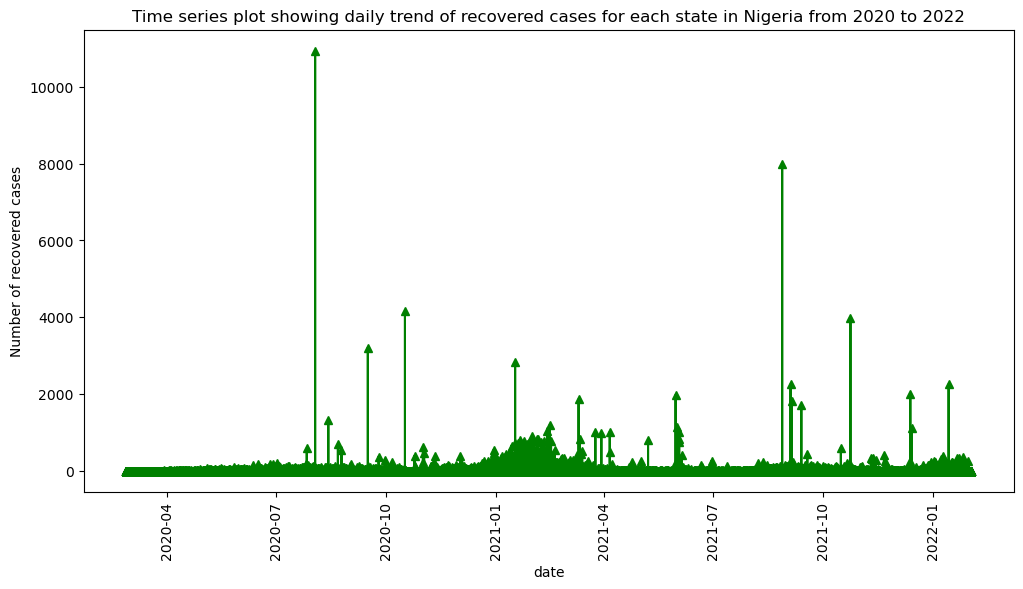

In [46]:
# Create a figure and axis object
fig,ax = plt.subplots(figsize = (12,6))
    
# Create a time series for all cases
plt.plot(df['date'],df['recovered'], color = 'green', marker = '^')
    
# Set the other parameters
plt.title('Time series plot showing daily trend of recovered cases for each state in Nigeria from 2020 to 2022')
plt.xlabel('date')
plt.xticks(rotation = 90)
plt.ylabel('Number of recovered cases')

plt.show()

Based on this time series plot for COVID-19 across each state in Nigeria, the recovered cases were also quite controlled and didnt go pass a particular point sometimes. However, there were many random points with high recovered case once in a while. The highest number of recovered case was seen around August 2020 from the plot.

In [47]:
ans3 = df['recovered'].sum()
print('The total recovered Cases in Nigeria for the time period of the analysis was {}'.format(ans3))

The total recovered Cases in Nigeria for the time period of the analysis was 229076


## 4. What was the mortality rate in Nigeria from covid-19?

Mortality rate can be defined as the number of death cases divided by the number of confirmed cases in Nigeria. A new column called mortality_rate will be created and grouped by date, so we can visualize the daily mortality rate from 2020 to 2022 in Nigeria

In [48]:
# Find the total daily confirmed and death cases, and put result in a new dataframe
mortality = df.groupby('date')[['confirmed', 'deaths']].sum()
mortality = pd.DataFrame(mortality)

# Create a new column for mortality rate
mortality['mortality_rate%'] = round(mortality['deaths']/mortality['confirmed']*100,2)

# For columns where both values are 0, the result will be a NaN value, so I will replace NaN with 0
mortality['mortality_rate%'] = mortality['mortality_rate%'].fillna(0)

# 0 divided by a whole number eg (0/1) will result in inf. So we I replace inf value with 0
mortality['mortality_rate%'] = mortality['mortality_rate%'].replace(np.inf, 0)

# Show the result
mortality.sample(5)

,confirmed,deaths,mortality_rate%
date,,,
2020-08-19,593,4,0.67
2020-03-13,0,0,0.00
2022-01-16,239,5,2.09
2020-08-30,138,2,1.45
2020-08-26,221,3,1.36


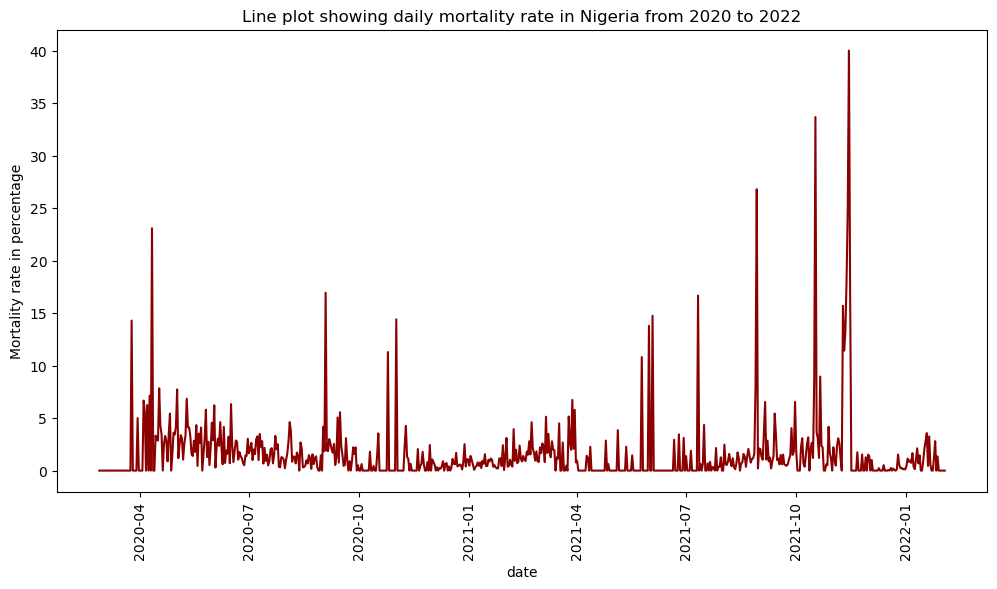

In [49]:
# Create a figure and axis object
fig,ax = plt.subplots(figsize = (12,6))
    
# Create a time series for all cases
plt.plot(mortality.index, mortality['mortality_rate%'], color = 'darkred')
    
# Set the other parameters
plt.title('Line plot showing daily mortality rate in Nigeria from 2020 to 2022')
plt.xlabel('date')
plt.xticks(rotation = 90)
plt.ylabel('Mortality rate in percentage')

plt.show()

From this Line plot, the mortality rate continued to fluctuate throughout both years, however the highest mortality rate was seen around the end of the year 2020 from the plot. 

In total, the mortality rate all through 2020 to 2022 in Nigeria was 1.24%, meaning only a small population died from the virus. 

In [50]:
ans4 = round((ans2/ans1)*100,2)
print('The total mortality rate in Nigeria was {}%'.format(ans4))

The total mortality rate in Nigeria was 1.24%


## 5. What was the recovery rate in Nigeria from covid-19?

Recovery rate can be defined as the number of recovery cases divided by the number of confirmed cases in Nigeria. A new column called recovery_rate will be created and grouped by date, so we can visualize the daily recovery rate from 2020 to 2022 in Nigeria

In [51]:
# Find the total daily confirmed and recovered cases, and put result in a new dataframe
recovery = df.groupby('date')[['confirmed', 'recovered']].sum()
recovery = pd.DataFrame(recovery)

# Create a new column for mortality rate
recovery['recovery_rate%'] = round(recovery['recovered']/recovery['confirmed']*100,2)

# For columns where both values are 0, the result will be a NaN value, so I will replace NaN with 0
recovery['recovery_rate%'] = recovery['recovery_rate%'].fillna(0)

# 0 divided by a whole number eg (0/1) will result in inf. So we I replace inf value with 0
recovery['recovery_rate%'] = recovery['recovery_rate%'].replace(np.inf, 0)

# Show the result
recovery.sample(5)

,confirmed,recovered,recovery_rate%
date,,,
2021-02-01,676,1286,190.24
2020-11-09,94,159,169.15
2020-04-08,20,0,0.00
2021-01-15,1867,705,37.76
2020-03-12,0,0,0.00


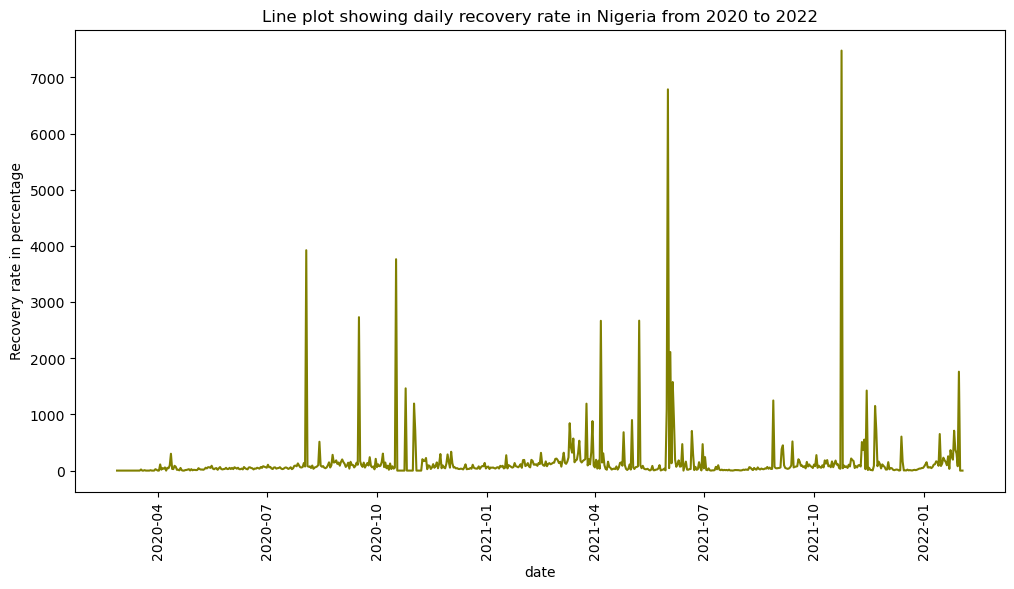

In [52]:
# Create a figure and axis object
fig,ax = plt.subplots(figsize = (12,6))
    
# Create a time series for all cases
plt.plot(recovery.index, recovery['recovery_rate%'], color = 'olive')
    
# Set the other parameters
plt.title('Line plot showing daily recovery rate in Nigeria from 2020 to 2022')
plt.xlabel('date')
plt.xticks(rotation = 90)
plt.ylabel('Recovery rate in percentage')

plt.show()

From this Line plot, the recovery rate was almost constant all through both years, however there were the occasional high spikes in recovery rate. Some of the highest spikes were seen just before September 2020 and around October 2021 from the plot.

In total, the recovery rate all through 2020 to 2022 in Nigeria was 90.54%, meaning a high percentage of Nigerians that contacted the virus during this period made a full recovery. 

In [53]:
ans5 = round((ans3/ans1)*100,2)
print('The total recovery rate in Nigeria was {}%'.format(ans5))

The total recovery rate in Nigeria was 90.54%


## 6. What was the daily average number of confirmed, death and recovered cases in Nigeria?

I will group the cases by date, and visualize these cases from February 2020 to February 2022 with a line plot

In [54]:
# Find the daily average of confirmed,death and recovered cases in Nigeria from 2020 to 2022
average_cases = df.groupby('date')[['confirmed','deaths','recovered']].mean()
average_cases = round(average_cases)

# convert result to a dataframe. The date becomes the index while confirmed, death and recovered will
# have their own columns
average_cases = pd.DataFrame(average_cases)
average_cases.sample(5)

,confirmed,deaths,recovered
date,,,
2020-10-01,4.0,0.0,3.0
2021-11-10,2.0,0.0,10.0
2021-06-27,0.0,0.0,0.0
2020-10-02,3.0,0.0,4.0
2020-09-26,4.0,0.0,3.0


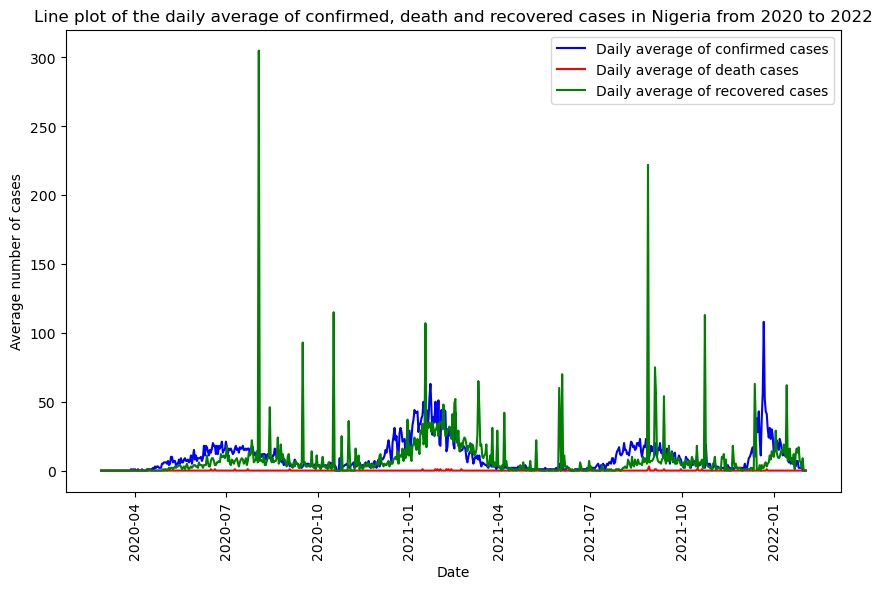

In [55]:
fig,ax = plt.subplots(figsize = (10,6))

plt.plot(average_cases.index, average_cases['confirmed'], color = 'blue', label = 'Daily average of confirmed cases')
plt.plot(average_cases.index, average_cases['deaths'], color = 'red', label = 'Daily average of death cases')
plt.plot(average_cases.index, average_cases['recovered'], color = 'green', label = 'Daily average of recovered cases')


plt.legend()
plt.xlabel('Date')
plt.ylabel('Average number of cases')
plt.xticks(rotation = 90)
plt.title('Line plot of the daily average of confirmed, death and recovered cases in Nigeria from 2020 to 2022')

plt.show()

From the Line plot showing the daily average confirmed, deaths and recovered cases overtime, the daily average number of death cases was seen to be constant over the time period, the daily average number of confirmed cases gradually rose and fell overtime, the daily average number of recovered cases showed sharp increase at random points during the 2020 to 2022 period. 

In [56]:
ans6 =  round(average_cases['confirmed'].mean())
ans7 =  round(average_cases['deaths'].mean(),2)
ans8 =  round(average_cases['recovered'].mean())

print('The daily average number of confirmed cases in Nigeria was {}'.format(ans6))
print('The daily average number of death cases in Nigeria was {}'.format(ans7))
print('The daily average number of recovered cases in Nigeria was {}'.format(ans8))

The daily average number of confirmed cases in Nigeria was 10
The daily average number of death cases in Nigeria was 0.04
The daily average number of recovered cases in Nigeria was 9


## 7. What was the monthly average number of confirmed, death and recovered cases in Nigeria?

I will group the cases by month&year, and visualize these cases from February 2020 to February 2022 using a bar plot

**Firstly, I will create a new column that consists of only month and year**

In [57]:
# Create a new column that has only month and year values
df['month_year'] = df['date'].dt.strftime('%m-%Y')

# The result of the datatype is object, but we have to convert the datatype to 'datetype' for it to be ordered 
# in calendar style
df['month_year'] = pd.to_datetime(df['date']).dt.to_period('M') 

df['month_year'].dtype

period[M]

**Secondly, I will create a new dataframe where each month-year eg 02-2020 shows the monthly average number of confirmed, death and recovered cases in all states across nigeria**

In [58]:
# Find the total number of confirmed,death and recovered cases in Nigeria for each month from 2020 to 2022
month_yr_cases = df.groupby('month_year')[['confirmed','deaths','recovered']].mean()

# convert result to a dataframe. The month_year date becomes the index while confirmed, death and recovered will
# have their own columns
month_yr_cases =  pd.DataFrame(month_yr_cases)

#round up the values for confirmed and recovered but leave death cases because rounding it will give 0 for all values
month_yr_cases[['confirmed','recovered']] = round(month_yr_cases[['confirmed','recovered']])

month_yr_cases

,confirmed,deaths,recovered
month_year,,,
2020-02,0.0,0.000000,0.0
2020-03,0.0,0.001744,0.0
2020-04,2.0,0.049550,0.0
2020-05,7.0,0.200523,2.0
2020-06,14.0,0.272973,6.0
2020-07,15.0,0.251962,9.0
2020-08,9.0,0.116827,19.0
2020-09,4.0,0.089189,8.0
2020-10,3.0,0.015693,6.0


**Thirdly, I will draw a bar plot to visualize the above table**

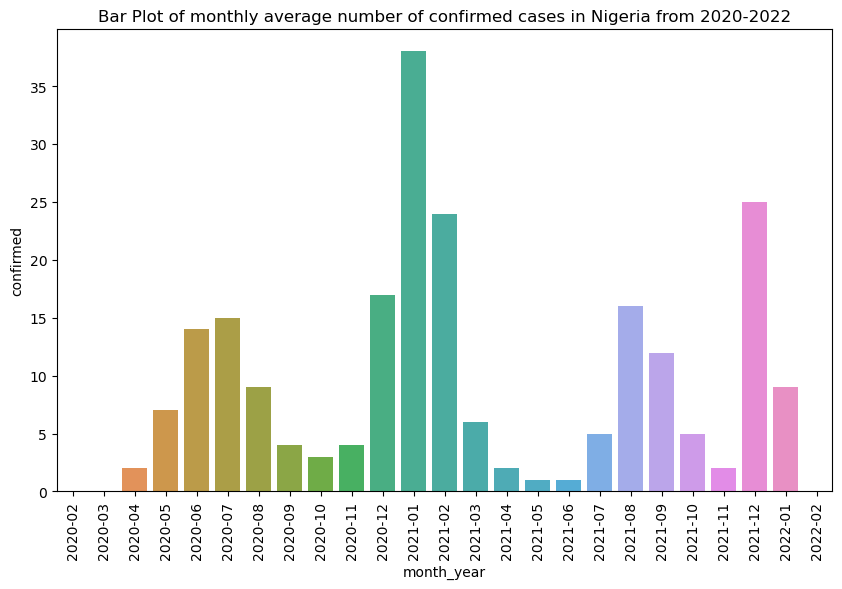

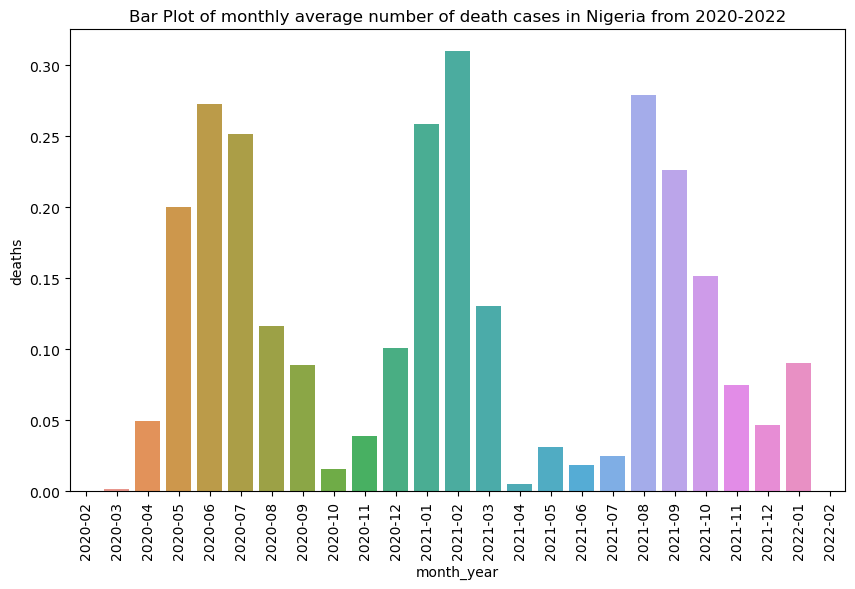

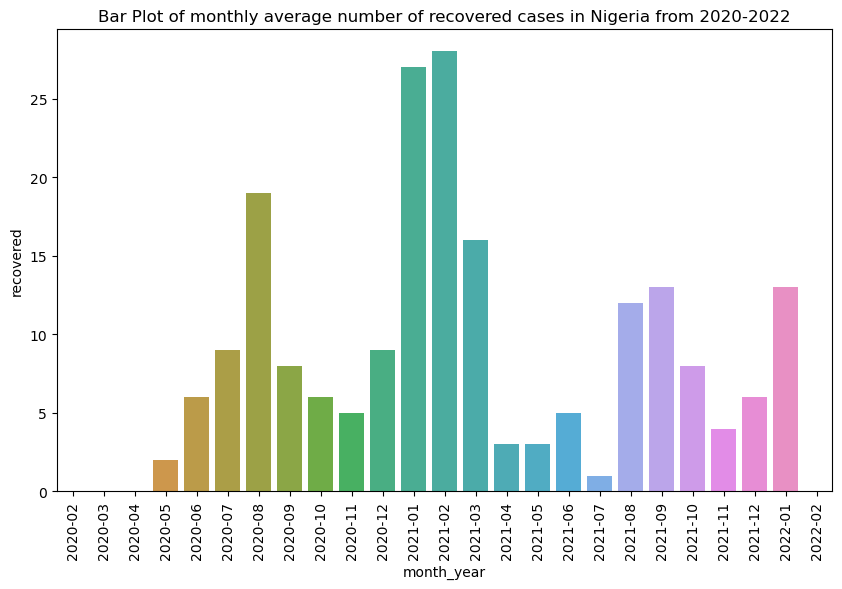

In [59]:
for cases,title in zip(['confirmed','deaths','recovered'], ['Bar Plot of monthly average number of confirmed cases in Nigeria from 2020-2022', 'Bar Plot of monthly average number of death cases in Nigeria from 2020-2022', 'Bar Plot of monthly average number of recovered cases in Nigeria from 2020-2022']):
    
    # Create a figure and axis object
    fig, ax = plt.subplots(figsize = (10,6))
    
    # Create a bar plot for all cases
    sns.barplot(x = month_yr_cases.index, y = month_yr_cases[cases])
    
    # Rotate the xlabel to easier readability
    plt.xticks(rotation = 90)
   
    # Create the title for all cases
    plt.title(title)
    
    plt.show()
    

From the bar plots above, we can see that the monthly average number of confirmed, death and recovered cases continued to fluctuate across the months from 2020 to 2022. It gradually rose then fell and continued with this pattern.

In [60]:
ans9 =   round(month_yr_cases['confirmed'].mean())
ans10 =  round(month_yr_cases['deaths'].mean(),2)
ans11 =  round(month_yr_cases['recovered'].mean())

print('Total montly average number of confirmed cases in Nigeria was {}'.format(ans9))
print('Total monthly average number of death cases in Nigeria was {}'.format(ans10))
print('Total monthly average number of recovered cases in Nigeria was {}'.format(ans11))

Total montly average number of confirmed cases in Nigeria was 9
Total monthly average number of death cases in Nigeria was 0.11
Total monthly average number of recovered cases in Nigeria was 8


## 8. What state was affected the most by the pandemic?

In order to address this question, I will first group the cases by state and then visualize the result using a barplot.

In [61]:
# Find the total number of confirmed,death and recovered cases in Nigeria for each state from 2020 to 2022
df4 = df.groupby('state')[['confirmed','deaths','recovered']].sum()

# Create a new dataframe to hold this information. state is the index and the cases have their wn columns
state_cases = pd.DataFrame(df4)
state_cases

,confirmed,deaths,recovered
state,,,
Abia,2152,34,2112
Adamawa,1203,32,1103
Akwa Ibom,4625,44,4494
Anambra,2744,19,2678
Bauchi,1936,24,1878
Bayelsa,1305,28,1277
Benue,2129,25,1764
Borno,1629,44,1591
Cross River,778,25,746


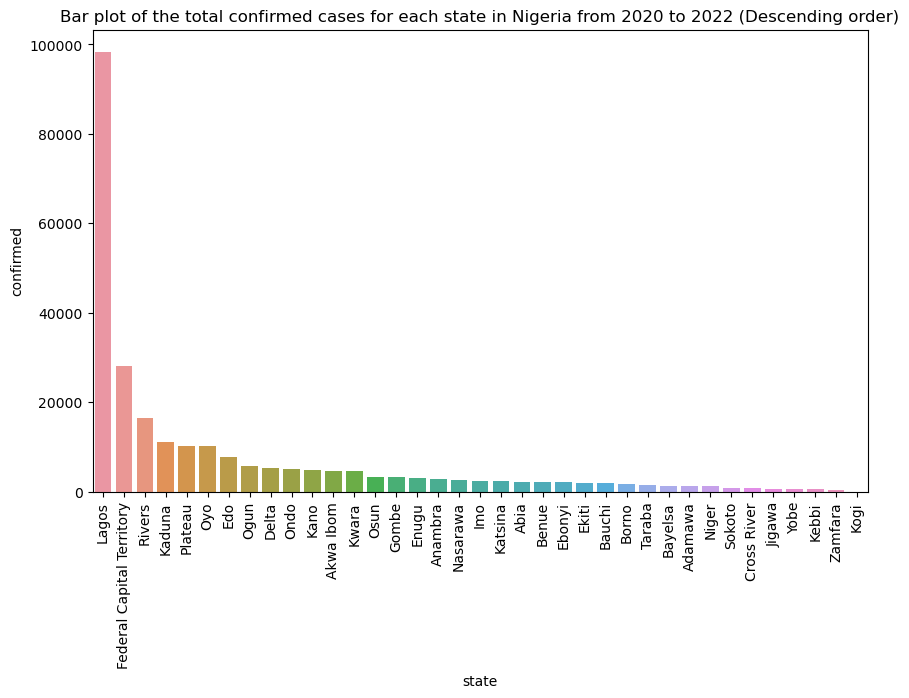

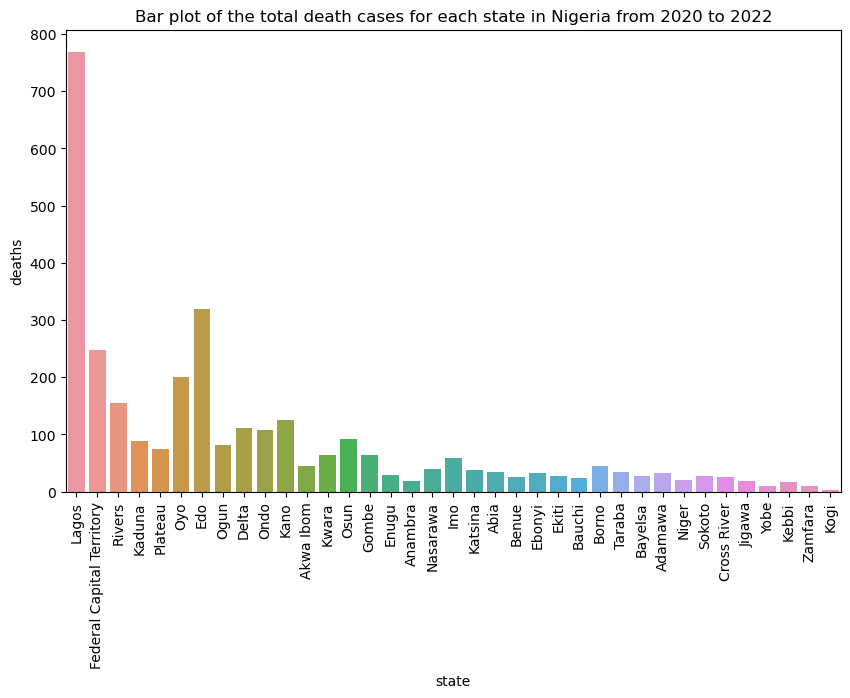

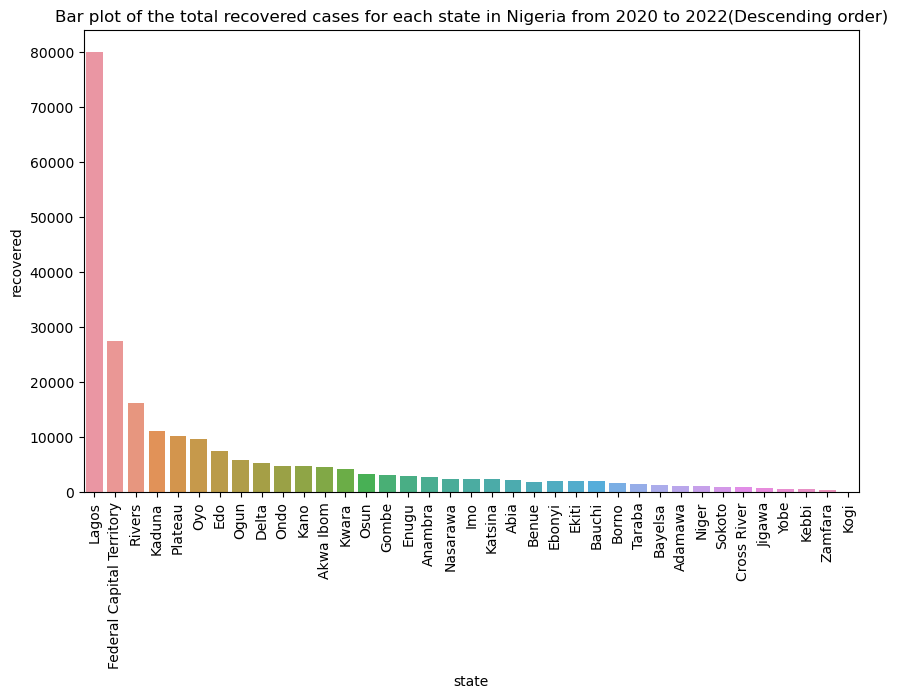

In [62]:
# Draw a bar plot to visualize the result
cases = ['confirmed','deaths','recovered']
titles = ['Bar plot of the total confirmed cases for each state in Nigeria from 2020 to 2022 (Descending order)', 'Bar plot of the total death cases for each state in Nigeria from 2020 to 2022', 'Bar plot of the total recovered cases for each state in Nigeria from 2020 to 2022(Descending order)']

for case, title in zip(cases,titles):
    # Sort each case in descending order
    state_cases_sorted = state_cases.sort_values(by =cases, ascending = False)
    
    # Create figure and axis object and also barplots
    fig,ax = plt.subplots(figsize = (10,6))
    sns.barplot(x = state_cases_sorted.index , y= state_cases_sorted[case])
    plt.xticks(rotation = 90)
    
    plt.title(title)
    plt.show()
            

From the bar plot above, Lagos state took the largest hit, having the highest confirmed, death and recovery cases by a landslide in comparison with other states.
This could have been brought about by the high population and relatively smaller land mass of lagos state in comparison with other states.

The capital city (FCT) also recorded some high confirmed, death and recovery cases in comparison to other states but not nearly as high as Lagos state. 

> I will perform a further analysis to investigate the top 2 states in Nigeria hit the most my the pandemic.
Lagos and Federal Capital Territory, Which will be refered to as High Risk areas

## Analysis on the High Risk Areas

### a). Analysis on Lagos state - Scatter plot visualizing the daily number of cases in Lagos state

In [63]:
# to Show only the rows that have lagos in the state column
lagos = df.loc[df['state'] == 'Lagos']

#to reset the index of this new dataframe
lagos = lagos.reset_index(drop= True) 

#show the resulting dataframe
lagos.sample(5)

,date,country,state,confirmed,deaths,recovered,confirmed_gender_unspecified,month_year
267,2020-11-20,Nigeria,Lagos,70,0,87,70,2020-11
259,2020-11-12,Nigeria,Lagos,71,0,0,71,2020-11
301,2020-12-24,Nigeria,Lagos,316,0,128,316,2020-12
516,2021-07-27,Nigeria,Lagos,356,0,0,356,2021-07
405,2021-04-07,Nigeria,Lagos,24,0,0,24,2021-04


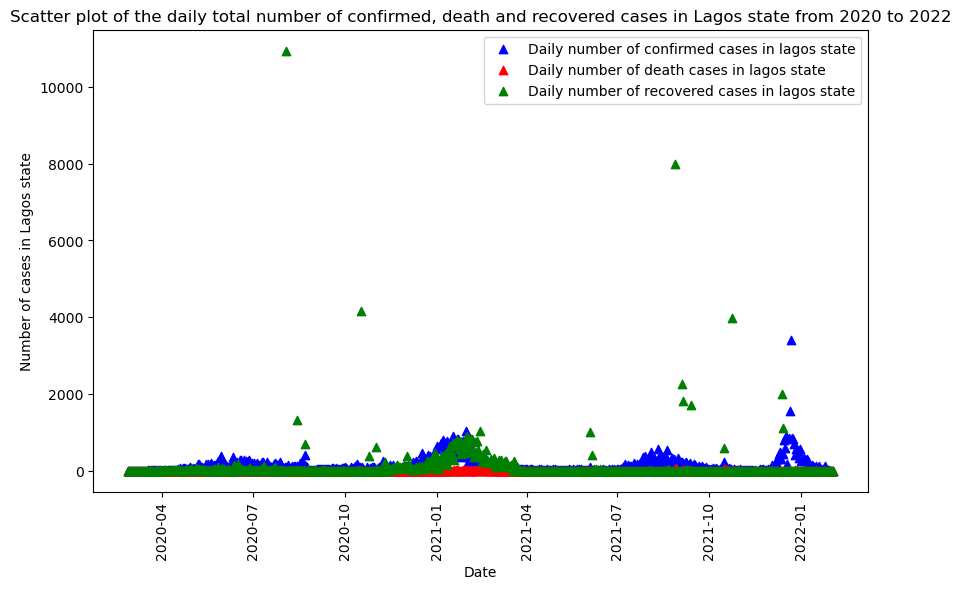

In [64]:
fig,ax = plt.subplots(figsize = (10,6))

plt.scatter(lagos['date'], lagos['confirmed'], color = 'blue', marker = '^', label = 'Daily number of confirmed cases in lagos state')
plt.scatter(lagos['date'], lagos['deaths'], color = 'red',  marker = '^', label = 'Daily number of death cases in lagos state')
plt.scatter(lagos['date'], lagos['recovered'], color = 'green',  marker = '^', label = 'Daily number of recovered cases in lagos state')


plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of cases in Lagos state')
plt.xticks(rotation = 90)
plt.title('Scatter plot of the daily total number of confirmed, death and recovered cases in Lagos state from 2020 to 2022')

plt.show()

In [65]:
round(lagos[['confirmed','deaths','recovered']].mean())

confirmed    139.0
deaths         1.0
recovered    113.0
dtype: float64

Looking at the chart, Lagos had a bit of control over the pandemic, 
- the average daily confirmed case was 139
- the average daily death case was 1 
- the average daily recovered case was 113

However, there were some really high number of cases on certain days.

- 22nd December,2021 held the highest number of confirmed cases in lagos with a total of 3,393 cases
- 29th August 2021 held the highest number of death cases in Lagos with a total of 79 cases 
- 3rd August 2020 held the highest number of recovered cases in Lagos with a total of 10,946 cases. 


### b) Analysis on Federal Capital Territory(FCT) - Scatter plot visualizing the daily number of cases in FCT

In [66]:
#to Show only the rows that have lagos in the state column
fct = df.loc[df['state'] == 'Federal Capital Territory']

#to reset the index of this new dataframe
fct = fct.reset_index(drop= True) 

#show the resulting dataframe
fct.sample(5)

,date,country,state,confirmed,deaths,recovered,confirmed_gender_unspecified,month_year
488,2021-06-29,Nigeria,Federal Capital Territory,0,0,0,0,2021-06
461,2021-06-02,Nigeria,Federal Capital Territory,0,0,0,0,2021-06
568,2021-09-17,Nigeria,Federal Capital Territory,11,0,0,11,2021-09
356,2021-02-17,Nigeria,Federal Capital Territory,58,0,4,58,2021-02
420,2021-04-22,Nigeria,Federal Capital Territory,4,0,0,4,2021-04


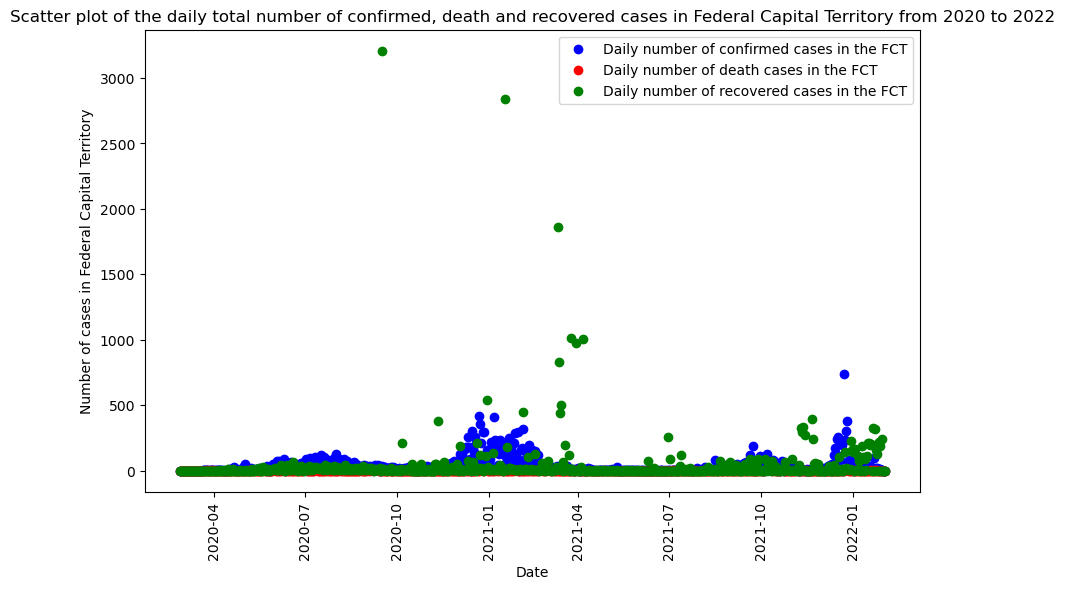

In [67]:
fig,ax = plt.subplots(figsize = (10,6))

plt.scatter(fct['date'], fct['confirmed'], color = 'blue', label = 'Daily number of confirmed cases in the FCT')
plt.scatter(fct['date'], fct['deaths'], color = 'red', label = 'Daily number of death cases in the FCT')
plt.scatter(fct['date'], fct['recovered'], color = 'green', label = 'Daily number of recovered cases in the FCT')


plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of cases in Federal Capital Territory')
plt.xticks(rotation = 90)
plt.title('Scatter plot of the daily total number of confirmed, death and recovered cases in Federal Capital Territory from 2020 to 2022')

plt.show()


In [68]:
round(fct[['confirmed','deaths','recovered']].mean())

confirmed    40.0
deaths        0.0
recovered    39.0
dtype: float64

Looking at the chart, FCT majorly had low number of cases during the pandemic. 

- The average daily confirmed case was 40
- The average daily death case was 0 
- The average daily recovered case was 40

However, there were some really high number of cases on certain days, similar to what we saw in Lagos.

- 23rd December,2021 held the highest number of confirmed cases in FCT with a total of 734 cases
- 1st September 2020 held the highest number of death cases in FCT with a total of 9 cases 
- 16th September 2020 held the highest number of recovered cases in FCT with a total of 3,208 cases.

**The state most affected by the pandemic was Lagos state, followed by the Federal Capital Territory**

## 9. What gender was most affected by the pandemic?

To answer this question, I will first group the confirmed_females and confirmed_males from the df2 dataframe and confirmed_gender_unspecified from the df dataframe by date and then concatenate all into the a new dataframe.

The reason I didnt add the confirmed_gender_unspecified into the df2 dataframe initially was becasue the columns with values >0 in the confirmed_gender_unspecified column did not match the 'non-specifie row'. However, when we group by date, everything aligns. <a href="#7.-Creating-a-new-dataframe-out-of-the-original-dataframe">See here for clarity</a>

In [69]:
# Find the total number of confirmed cases for females and males in Nigeria for each day from 2020 to 2022
df5 = df1.groupby('date')[['confirmed_females', 'confirmed_males']].sum()
df5 = pd.DataFrame(df5)
df5.sample(5)

,confirmed_females,confirmed_males
date,,
2020-10-02,81,45
2021-06-29,0,0
2020-12-17,0,0
2021-05-14,0,0
2022-01-04,0,0


In [70]:
# Find the total number of confirmed cases for unspecified gender in Nigeria for each day from 2020 to 2022
df6 = df.groupby('date')['confirmed_gender_unspecified'].sum()
df6 = pd.DataFrame(df6)
df6.sample(5)

,confirmed_gender_unspecified
date,
2021-05-03,18
2021-09-09,727
2021-03-12,399
2020-03-27,0
2021-08-30,480


In [71]:
# Join both df5 and df6 into one dataframe
df7 = pd.concat([df5,df6], axis = 1)
df7.head()

,confirmed_females,confirmed_males,confirmed_gender_unspecified
date,,,
2020-02-27,0,0,1
2020-02-28,0,0,0
2020-02-29,0,0,0
2020-03-01,0,0,0
2020-03-02,0,0,0


### Scatter plot visualizing the number of confirmed cases in Female vs Male vs Unspecified gender

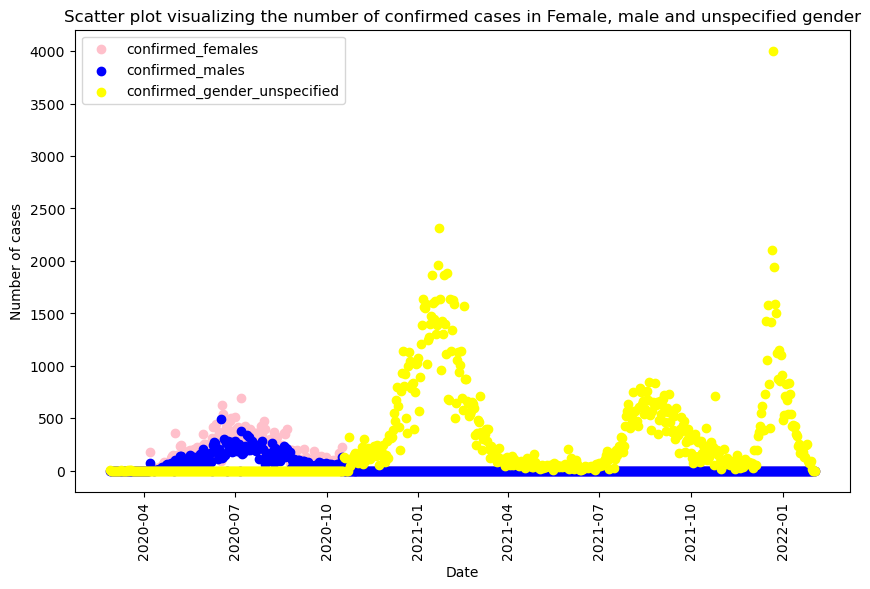

In [72]:
fig,ax = plt.subplots(figsize = (10,6))

plt.scatter(df7.index, df7['confirmed_females'], label = 'confirmed_females', color = 'pink')
plt.scatter(df7.index, df7['confirmed_males'], label = 'confirmed_males', color = 'blue')
plt.scatter(df7.index, df7['confirmed_gender_unspecified'], label = 'confirmed_gender_unspecified', color = 'yellow')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.xticks(rotation = 90)
plt.title('Scatter plot visualizing the number of confirmed cases in Female, male and unspecified gender')

plt.show()

From this graph, we can notice that after 10/2020, they stopped classifying female and male confirmed cases and put all confirmed cases as gender unspecified.

I will use a piechart to better visualize of the number of confirmed cases for female vs male before October 2020. 

### Piechart visualizing the confirmed female and male cases before October 2020

In [73]:
df1.head()

,date,state,confirmed_females,confirmed_males
0,2020-02-27,Unspecified,0,0
1,2020-02-28,Unspecified,0,0
2,2020-02-29,Unspecified,0,0
3,2020-03-01,Unspecified,0,0
4,2020-03-02,Unspecified,0,0


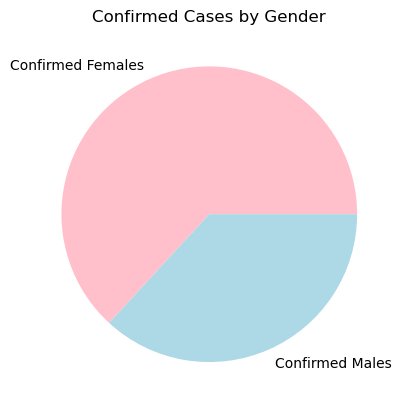

In [74]:
female_confirmed = df1['confirmed_females'].sum()
male_confirmed = df1['confirmed_males'].sum()

# set desired colors
colors = ['pink', 'lightblue']

# create a pie chart of total confirmed cases and separate bars for confirmed females and males
plt.pie([female_confirmed, male_confirmed] , labels = ['Confirmed Females', 'Confirmed Males'], colors = colors)

# set the title and axis labels
plt.title('Confirmed Cases by Gender')

# show the plot
plt.show();

In [75]:
print('There are {} total confirmed females and {} total confirmed males specified.'. format(female_confirmed, male_confirmed))


There are 38420 total confirmed females and 22422 total confirmed males specified.


**The gender affected the most by the pandemic for the record given till october 2020 was the female gender**

## 10. Was there any correlation between the confirmed, death and recovered cases?

To find what cases are strongly or least correlated to each other, I will use a heatmap to visulize the relationship between confirmed, death and recovered cases

In [76]:
# Dropping columns we do not need in our correlation analysis
corr_df = df.drop(['date', 'country', 'state', 'confirmed_gender_unspecified', 'month_year'], axis = 1)
corr_df.sample(5)

,confirmed,deaths,recovered
7186,0,0,0
11961,0,0,0
26002,0,0,0
9901,0,0,0
4463,0,0,0


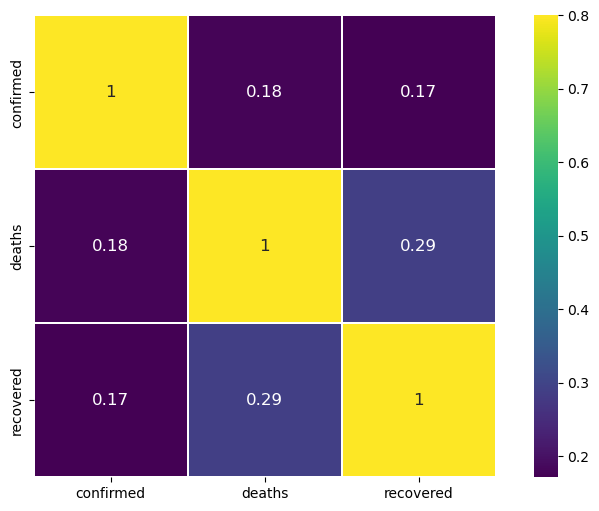

In [77]:
# Getting the correlation coefficient
correlation = corr_df.corr()

# Creating a heatmap to visualize the correlation coefficients
f, ax = plt.subplots(figsize = (10,6))
sns.heatmap(correlation, vmax = 0.8, linewidths = 0.01, square = True, annot = True, cmap = 'viridis',
           linecolor = 'white', xticklabels = correlation.columns, annot_kws = {'size':12}, 
            yticklabels = correlation.columns);

Based on this threshold;
- 0.1 to 0.3  is a weak correlation
- 0.3 to 0.7  is an average correlation
- 0.7 to 1.0  is a strong correlation

1. The correlation coefficient between confirmed and deaths was 0.18, indicating a weak positive correlation. This means that as the number of confirmed cases increases, there is a slight tendency for the number of deaths to increase as well.
2. The correlation coefficient between confirmed and recovered was 0.17, also indicating a weak positive correlation. This means that as the number of confirmed cases increases, there is a slight tendency for the number of recoveries to increase as well.
3. The correlation coefficient between deaths and recovered was 0.29, indicating a weak positive correlation. This means that as the number of deaths increases, there is a tendency for the number of recoveries to increase as well.

# Analysis Insight

Based on the analysis of the COVID-19 pandemic in Nigeria from 2020 to 2022, it is clear that the pandemic had quite an impact on the country. Nigeria recorded a total of 253,024 confirmed cases, 3,135 deaths, and 229,076 recoveries during this period.

The mortality rate from COVID-19 was 1.24%, while the recovery rate was 90.54%. This suggests that while the pandemic had been deadly, a great number of the Nigeria population that contacted this virus recovered from it. 

The daily average of confirmed, death, and recovered cases in Nigeria for the period of analysis was 10, 0.04, and 9 respectively, while the monthly average was 9, 0.11, and 8 respectively. This indicates that while there were fluctuations in the number of cases, deaths, and recoveries over time, the pandemic was generally present throughout the period of analysis.

Lagos state was the most affected by the pandemic, recording the highest number of confirmed cases, deaths, and recoveries. In terms of gender, both males and females were affected by the pandemic, but females appeared to have a slightly higher risk of contracting the disease in the first 6 months of the pandemic.

Finally, there was a weak correlation between the number of confirmed, death, and recovery cases. As the number of confirmed cases increased, there was a slight increase the number of deaths and recoveries. This suggests that efforts to control the spread of the disease can also impact the number of deaths and recoveries.

Overall, this analysis provided valuable insights into the COVID-19 pandemic in Nigeria, and highlighted the need for continued efforts to control the spread of the disease and support those who had been affected by it.


*The End*

***Hope you enjoyed this notebook. Connect with me using the below links.***

[My linkedin](https://www.linkedin.com/in/judith-okon-pmp%C2%AE-146451138/) 
[My Twitter](https://twitter.com/likedbyJ)
[My Github](https://github.com/Judithokon)